_______________________

# DISKRETISASI

-----------------------

In [1]:
import numpy as np
import pandas as pd

________________________________________________________________________________

# DISKRETIASI TIDAK TERSUPERVISI

_____________________________________

# Equal Width :

In [2]:
x = [15,4,21,11,16,18,24,26,28]

In [3]:
bins = np.linspace(np.min(x),np.max(x),4)
print("bins: {} ".format(bins))

bins: [  4.  12.  20.  28.] 


In [4]:
list(bins)

[4.0, 12.0, 20.0, 28.0]

In [5]:
kategori_x=np.digitize(x,bins=bins)
list(kategori_x)

[2, 1, 3, 1, 2, 2, 3, 3, 4]

In [6]:
# list(pd.cut(x,4,labels=False)+1) #cara lain 

In [7]:
hasil_diskretisasi=pd.DataFrame({'x':x})
hasil_diskretisasi['eqwid']=kategori_x
hasil_diskretisasi

,x,eqwid
0,15,2
1,4,1
2,21,3
3,11,1
4,16,2
5,18,2
6,24,3
7,26,3
8,28,4


# Equal Freq : 

In [8]:
list(pd.qcut(x,4,labels=False)+1)

[1, 1, 3, 1, 2, 2, 3, 4, 4]

In [9]:
hasil_diskretisasi['eqfreq']=list(pd.qcut(x,4,labels=False)+1)
hasil_diskretisasi

,x,eqwid,eqfreq
0,15,2,1
1,4,1,1
2,21,3,3
3,11,1,1
4,16,2,2
5,18,2,2
6,24,3,3
7,26,3,4
8,28,4,4


________________________________________________________________________________

# EFEK DISKRETISASI TERHADAP PEMODELAN

________________________________________________________________________________

In [10]:
data_disk=pd.read_csv('disk01.csv')

In [11]:
data_disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [12]:
print("dimensi data : \n",data_disk.shape)

dimensi data : 
 (1529, 2)


# Pemodelan Regresi Logistik : Tanpa Diskretisasi

# Pembagian Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_disk['x'],data_disk['class'],test_size=0.3,stratify=data_disk['class'])

# Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(x_train.reshape(-1,1),y_train)

C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluasi Prediksi

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,model.predict(x_test.reshape(-1,1))))

             precision    recall  f1-score   support

          0       0.53      0.48      0.50       221
          1       0.56      0.61      0.58       238

avg / total       0.54      0.54      0.54       459



C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


________________________________________________________________________________

# Pemodelan Regresi Logistik : Dengan Diskretisasi

________________________________________________________________________________

In [19]:
bins = np.linspace(x_train.min(),x_train.max(),10)
which_bin = np.digitize (x_train.reshape(-1,1),bins=bins)
which_bin

C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


array([[7],
       [2],
       [7],
       ..., 
       [6],
       [3],
       [3]], dtype=int64)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [22]:
x_train_binned = encoder.transform(which_bin)
x_test_binned = encoder.transform(np.digitize(x_test.reshape(-1,1),bins=bins))

C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


# Model

In [23]:
model2 = LogisticRegression()
model2.fit(x_train_binned,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluasi

In [24]:
print("Ukuran Prediksi Sebelum Diskretisasi : \n ",classification_report(y_test,model.predict(x_test.reshape(-1,1))),"\n")
print("Ukuran Prediksi Setelah Diskretisasi : \n ",classification_report(y_test,model2.predict(x_test_binned)),"\n")

Ukuran Prediksi Sebelum Diskretisasi : 
               precision    recall  f1-score   support

          0       0.53      0.48      0.50       221
          1       0.56      0.61      0.58       238

avg / total       0.54      0.54      0.54       459
 

Ukuran Prediksi Setelah Diskretisasi : 
               precision    recall  f1-score   support

          0       0.77      0.73      0.75       221
          1       0.76      0.79      0.78       238

avg / total       0.76      0.76      0.76       459
 



C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


# Ekplorasi Diskretisasi Lebih Lanjut

In [25]:
import matplotlib.pyplot as plt

In [26]:
data_disk['eqwid']=pd.cut(data_disk['x'],bins=10,labels=False)+1
data_disk.head()

,x,class,eqwid
0,51,0,7
1,19,1,1
2,66,1,10
3,35,0,4
4,64,1,10


In [27]:
tabulasi = pd.crosstab(data_disk['eqwid'],data_disk['class'],normalize=0)
tabulasi

class,0,1
eqwid,,
1,0.190141,0.809859
2,0.297297,0.702703
3,0.627451,0.372549
4,0.808140,0.191860
5,0.926606,0.073394
6,0.763314,0.236686
7,0.590909,0.409091
8,0.389262,0.610738
9,0.195266,0.804734


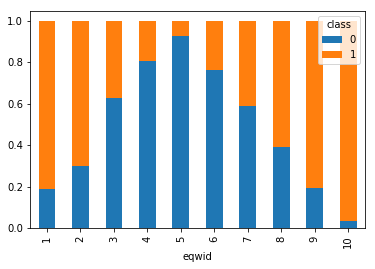

In [28]:
tabulasi.plot(kind='bar',stacked=True)
plt.show()

____________________

# DISKRETISASI TERSUPERVISI

________________________

# Chimerge : 

sumber program :
https://gist.github.com/alanzchen/17d0c4a45d59b79052b1cd07f531689e

In [29]:
import pandas as pd
from collections import Counter
import numpy as np

In [30]:
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [31]:
iris.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'type']

In [32]:
iris.head()

,sepal_l,sepal_w,petal_l,petal_w,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
def chimerge(data, attr, label, max_intervals):
    distinct_vals = sorted(set(data[attr])) # Sort the distinct values
    labels = sorted(set(data[label])) # Get all possible labels
    empty_count = {l: 0 for l in labels} # A helper function for padding the Counter()
    intervals = [[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))] # Initialize the intervals for each attribute
    while len(intervals) > max_intervals: # While loop
        chi = []
        for i in range(len(intervals)-1):
            # Calculate the Chi2 value
            obs0 = data[data[attr].between(intervals[i][0], intervals[i][1])]
            obs1 = data[data[attr].between(intervals[i+1][0], intervals[i+1][1])]
            total = len(obs0) + len(obs1)
            count_0 = np.array([v for i, v in {**empty_count, **Counter(obs0[label])}.items()])
            count_1 = np.array([v for i, v in {**empty_count, **Counter(obs1[label])}.items()])
            count_total = count_0 + count_1
            expected_0 = count_total*sum(count_0)/total
            expected_1 = count_total*sum(count_1)/total
            chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1
            chi_ = np.nan_to_num(chi_) # Deal with the zero counts
            chi.append(sum(chi_)) # Finally do the summation for Chi2
        min_chi = min(chi) # Find the minimal Chi2 for current iteration
        for i, v in enumerate(chi):
            if v == min_chi:
                min_chi_index = i # Find the index of the interval to be merged
                break
        new_intervals = [] # Prepare for the merged new data array
        skip = False
        done = False
        for i in range(len(intervals)):
            if skip:
                skip = False
                continue
            if i == min_chi_index and not done: # Merge the intervals
                t = intervals[i] + intervals[i+1]
                new_intervals.append([min(t), max(t)])
                skip = True
                done = True
            else:
                new_intervals.append(intervals[i])
        intervals = new_intervals
    for i in intervals:
        print('[', i[0], ',', i[1], ']', sep='')
    
    intervals2 = []
    for i in intervals:
        intervals2.append(i[0])
    intervals2.append(i[1])
    return intervals2

In [34]:
for attr in ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']:
    print('Interval for', attr)
    chimerge(data=iris, attr=attr, label='type', max_intervals=6)

Interval for sepal_l


C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


[4.3,4.8]
[4.9,4.9]
[5.0,5.4]
[5.5,5.7]
[5.8,7.0]
[7.1,7.9]
Interval for sepal_w
[2.0,2.2]
[2.3,2.4]
[2.5,2.8]
[2.9,2.9]
[3.0,3.3]
[3.4,4.4]
Interval for petal_l
[1.0,1.9]
[3.0,4.4]
[4.5,4.7]
[4.8,4.9]
[5.0,5.1]
[5.2,6.9]
Interval for petal_w
[0.1,0.6]
[1.0,1.3]
[1.4,1.6]
[1.7,1.7]
[1.8,1.8]
[1.9,2.5]


# Chimerge pada disk01.csv

In [35]:
data_disk.head()

,x,class,eqwid
0,51,0,7
1,19,1,1
2,66,1,10
3,35,0,4
4,64,1,10


In [36]:
bins_chimerge=chimerge(data=data_disk, attr='x', label='class', max_intervals=5)

C:\Users\Muy\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in true_divide


[18,23]
[24,30]
[31,45]
[46,54]
[55,67]


In [37]:
bins_chimerge

[18, 24, 31, 46, 55, 67]

In [38]:
data_disk['chimg']=np.digitize(data_disk['x'],bins=bins_chimerge)
data_disk.head()

,x,class,eqwid,chimg
0,51,0,7,4
1,19,1,1,1
2,66,1,10,5
3,35,0,4,3
4,64,1,10,5
